In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api

In [3]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


### スチューデントのt検定（等分散を仮定）

In [4]:
print(np.var(df[df['sex'] == 'Male']['tip_rate']), np.var(df[df['sex'] == 'Female']['tip_rate']))

0.004169445577529409 0.00284330042554882


In [5]:
print(np.mean(df[df['sex'] == 'Male']['tip_rate']), np.mean(df[df['sex'] == 'Female']['tip_rate']))

0.15765054700429743 0.16649073632892478


In [6]:
stats.ttest_ind(df[df['sex'] == 'Male']['tip_rate'], df[df['sex'] == 'Female']['tip_rate'], equal_var = True)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.27971038496054884)

### ウェルチのt検定（等分散とは言えない場合）

In [7]:
stats.ttest_ind(df[df['sex'] == 'Male']['tip_rate'], df[df['sex'] == 'Female']['tip_rate'], equal_var = False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.25424561889275826)

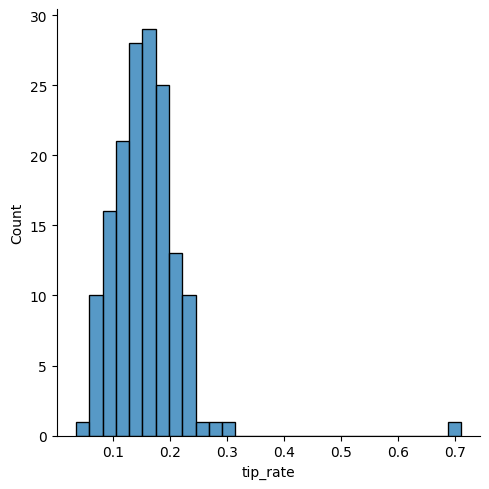

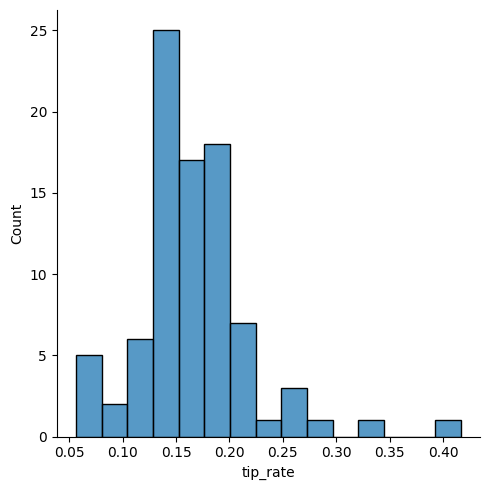

In [8]:
sns.displot(df[df['sex'] == 'Male']['tip_rate'])
sns.displot(df[df['sex'] == 'Female']['tip_rate'])

<AxesSubplot: xlabel='sex', ylabel='tip_rate'>

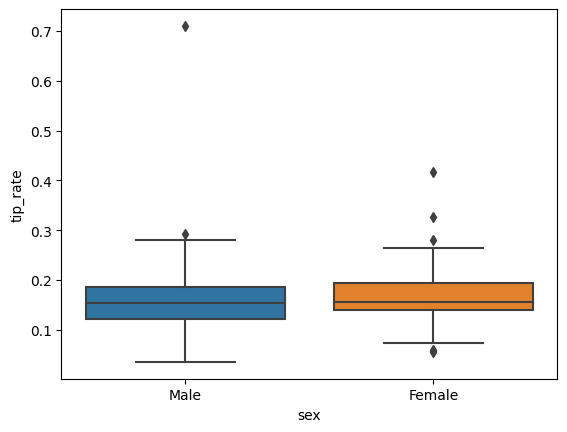

In [9]:
sns.boxplot(data = df, x = 'sex', y = 'tip_rate')

### シャピロ-ウィルク検定（母集団が正規分布である検定）

### Q-Qプロット

In [10]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

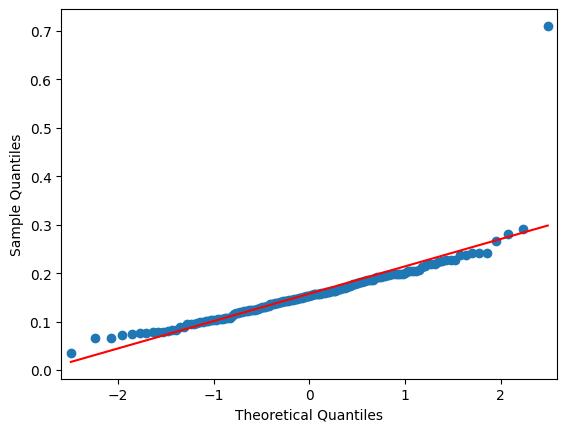

In [11]:
fig = statsmodels.api.qqplot(male_tipr, line = 'r')

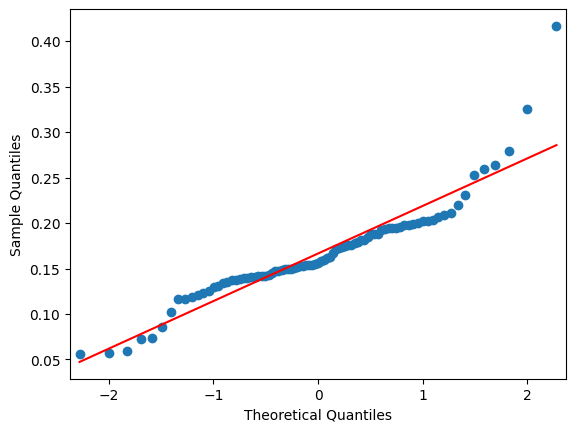

In [13]:
fig = statsmodels.api.qqplot(female_tipr, line = 'r')

In [19]:
print(stats.shapiro(male_tipr), stats.shapiro(female_tipr))

ShapiroResult(statistic=0.7447848916053772, pvalue=3.2243768151486588e-15) ShapiroResult(statistic=0.8982975482940674, pvalue=4.718069249065593e-06)


In [20]:
print(stats.shapiro(np.sort(male_tipr)[:-1]))

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)


In [23]:
print(stats.shapiro(np.sort(female_tipr)[:-2]))

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)


### 等分散性の検定

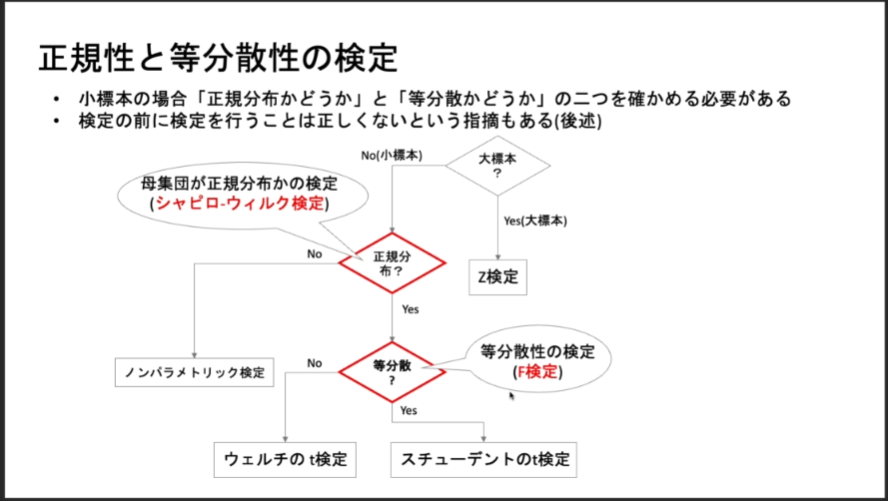

In [26]:
x = np.linspace(0, 3, 100)
y = stats.f(3, 3).pdf(x)

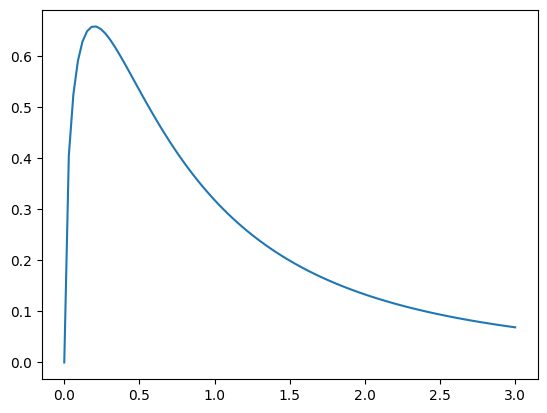

In [28]:
plt.plot(x, y)

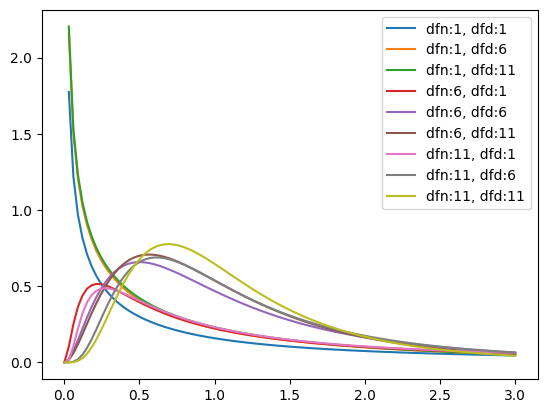

In [31]:
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn = dfn, dfd = dfd)
        plt.plot(x, y, label = f'dfn:{dfn}, dfd:{dfd}')
plt.legend()

In [38]:
print(np.var(male_tipr), np.var(female_tipr))

0.004169445577529409 0.00284330042554882


In [44]:
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 -1
dfd = n2 -1
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1 / var2
print(f)

1.4588472200534603


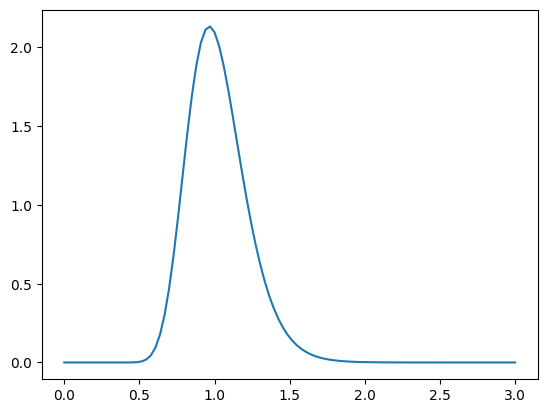

In [45]:
x = np.linspace(0, 3, 100)
y = stats.f(dfn = dfn, dfd = dfd).pdf(x)
plt.plot(x, y)

In [46]:
stats.f(dfn = dfn, dfd = dfd).sf(f)

0.02710086345437418

### 対応のある平均値差の検定

In [49]:
bp_df = pd.read_csv('data/blood_pressure.csv')
bp_df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [53]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'], alternative = 'greater')

TtestResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411, df=119)

In [55]:
bp_df['bp_before'].mean()

156.45

In [56]:
bp_df['bp_after'].mean()

151.35833333333332

In [57]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [59]:
bp_df['delta'].mean()

5.091666666666667

<AxesSubplot: >

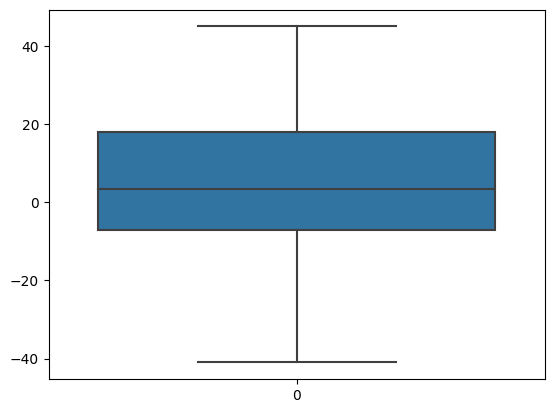

In [61]:
sns.boxplot(bp_df['delta'])